## 1. Вып. оболочки мн-ва $E$ $n$ точек.
1) Задать n=10, n=50, точек в квадрате 20x20
2) Построить conv(E) (Джарвис, Грэхем)
3) Найти периметр, площадь оболочки conv(E)
4) Задать m=5 точек в квадрате 20x20. Определить, явл-ся ли они внутренними для мн-ва E

## 2. Заслонение фигур
1) Задать два множества точек E1, E2 (по 8-10 точек в квадрате 20x20) (Точки не распределять на левые и правые, верхние и нижние)
2) Найти каркас (оболочку) E1, E2 (Фигуры F1, F2)
3) Найти часть F2, заполненную F1

In [2]:
import random
import math

def generate_points(n, square_size=20):
    return [(random.uniform(0, square_size), random.uniform(0, square_size)) for _ in range(n)]


def cross(o, a, b):
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0]) # Псевдоскалярное произведение

def jarvis_march(points):
    hull = []
    point_on_hull = min(points, key=lambda p: (p[0], p[1]))
    while True:
        hull.append(point_on_hull)
        endpoint = points[0]
        for j in range(1, len(points)):
            if endpoint == point_on_hull or cross(hull[-1], endpoint, points[j]) < 0:
                endpoint = points[j]
        point_on_hull = endpoint
        if endpoint == hull[0]:
            break
    return hull


def calculate_perimeter(hull):
    perimeter = 0
    for i in range(len(hull)):
        j = (i + 1) % len(hull)
        perimeter += math.dist(hull[i], hull[j]) # Просто проходимся по ребрам
    return perimeter

def calculate_area(hull):
    area = 0
    for i in range(len(hull)):
        j = (i + 1) % len(hull)
        area += hull[i][0] * hull[j][1]
        area -= hull[j][0] * hull[i][1] # Метод Гаусса https://ru.wikipedia.org/wiki/Формула_площади_Гаусса
        # Шнурочки
    return abs(area) / 2


def angle(o, a, b):
    oa = (a[0] - o[0], a[1] - o[1])
    ob = (b[0] - o[0], b[1] - o[1])
    dot_product = oa[0] * ob[0] + oa[1] * ob[1]
    magnitude_oa = math.sqrt(oa[0]**2 + oa[1]**2)
    magnitude_ob = math.sqrt(ob[0]**2 + ob[1]**2)
    cos_theta = dot_product / (magnitude_oa * magnitude_ob)
    return math.acos(cos_theta)


def is_point_inside_convex_hull(point, hull):
    total_angle = 0
    n = len(hull)
    for i in range(n):
        a = hull[i]
        b = hull[(i + 1) % n]
        total_angle += angle(point, a, b)
    return math.isclose(total_angle, 2 * math.pi, rel_tol=1e-9)

In [3]:
import matplotlib.pyplot as plt

def plot_convex_hull(points, hull, additional_points=None):
    plt.figure()
    x, y = zip(*points)
    plt.scatter(x, y, label='Points')
    hull_x, hull_y = zip(*hull + [hull[0]])
    plt.plot(hull_x, hull_y, 'r-', label='Convex Hull')

    if additional_points:
        for point in additional_points:
            color = 'g' if is_point_inside_convex_hull(point, hull) else 'b'
            plt.scatter(*point, c=color)

    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Convex Hull Visualization')
    plt.legend()
    plt.show()

Perimeter: 52.821292106081195, Area: 169.80440627146447


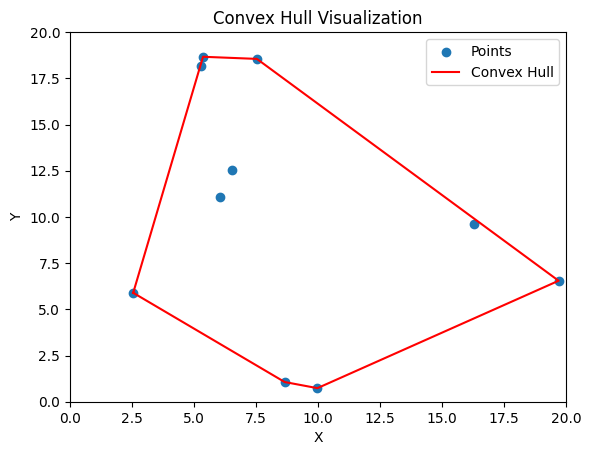

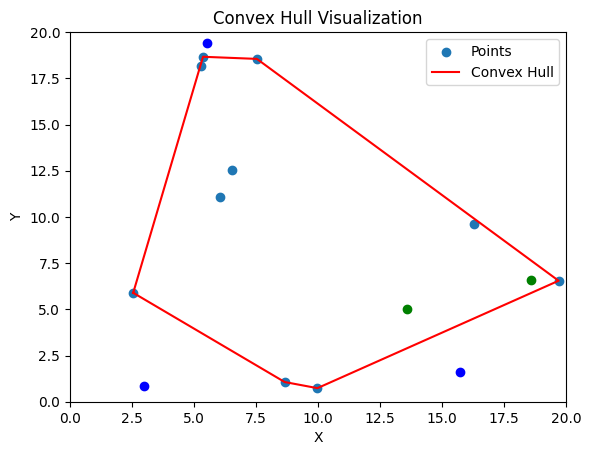

Perimeter: 64.4169688667418, Area: 299.6402314086571


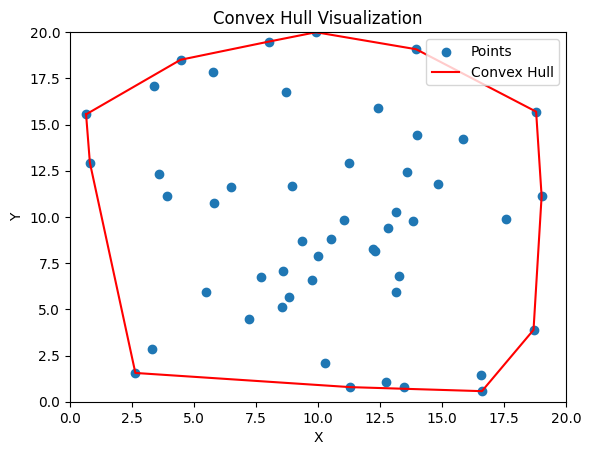

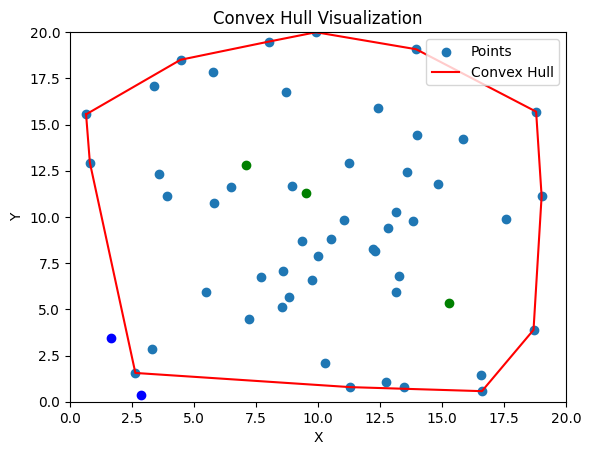

In [4]:
n_points = [10, 50]
for n in n_points:
    points = generate_points(n)

    hull_jarvis = jarvis_march(points)

    perimeter = calculate_perimeter(hull_jarvis)
    area = calculate_area(hull_jarvis)
    print(f"Perimeter: {perimeter}, Area: {area}")

    plot_convex_hull(points, hull_jarvis)

    m_points = generate_points(5)
    for point in m_points:
        inside = is_point_inside_convex_hull(point, hull_jarvis)

    plot_convex_hull(points, hull_jarvis, m_points)

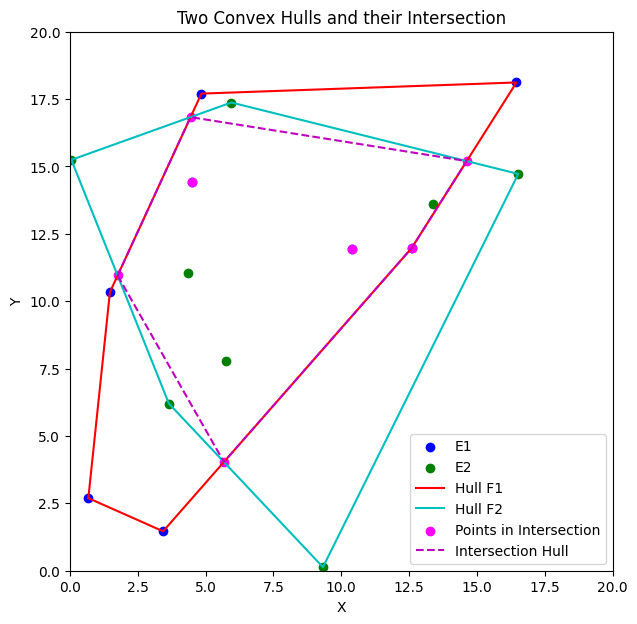

In [5]:
def calculate_line_equation(start, end):
    if end[0] == start[0]:
        return None, start[0]
    k = (end[1] - start[1]) / (end[0] - start[0])
    b = start[1] - k * start[0]
    return k, b

def is_point_on_segment(point, start, end):
    return min(start[0], end[0]) <= point[0] <= max(start[0], end[0]) and \
        min(start[1], end[1]) <= point[1] <= max(start[1], end[1])

def find_intersection(k1, b1, k2, b2):
    if k1 == k2:
        return None
    if k1 is None:
        x = b1
        y = k2 * x + b2
    elif k2 is None:
        x = b2
        y = k1 * x + b1
    else:
        x = (b2 - b1) / (k1 - k2)
        y = k1 * x + b1
    return (x, y)

def check_intersections(p1, p2, p3, p4):
    start1, end1 = p1, p2
    start2, end2 = p3, p4
    k1, b1 = calculate_line_equation(start1, end1)
    k2, b2 = calculate_line_equation(start2, end2)
    intersection = find_intersection(k1, b1, k2, b2)
    if intersection is not None and \
            is_point_on_segment(intersection, start1, end1) and \
            is_point_on_segment(intersection, start2, end2):
        return intersection

def plot_two_hulls(points1, hull1, points2, hull2, intersection_points=None, intersection_hull=None):
    plt.figure(figsize=(7,7))

    x1, y1 = zip(*points1)
    plt.scatter(x1, y1, color='blue', label='E1')

    x2, y2 = zip(*points2)
    plt.scatter(x2, y2, color='green', label='E2')

    hx1, hy1 = zip(*(hull1 + [hull1[0]]))
    plt.plot(hx1, hy1, 'r-', label='Hull F1')

    hx2, hy2 = zip(*(hull2 + [hull2[0]]))
    plt.plot(hx2, hy2, 'c-', label='Hull F2')

    if intersection_points:
        ix, iy = zip(*intersection_points)
        plt.scatter(ix, iy, color='magenta', label='Points in Intersection')

    if intersection_hull:
        hhx, hhy = zip(*(intersection_hull + [intersection_hull[0]]))
        plt.plot(hhx, hhy, 'm--', label='Intersection Hull')

    plt.legend()
    plt.title("Two Convex Hulls and their Intersection")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim(0, 20)
    plt.ylim(0, 20)
    plt.show()

E1 = generate_points(8, square_size=20)
E2 = generate_points(8, square_size=20)

F1 = jarvis_march(E1)
F2 = jarvis_march(E2)

intersection_points = []
for p in E1:
    if is_point_inside_convex_hull(p, F2):
        intersection_points.append(p)

for i in range(len(F1)):
    p1 = F1[i]
    p2 = F1[(i+1) % len(F1)]
    for j in range(len(F2)):
        p3 = F2[j]
        p4 = F2[(j+1) % len(F2)]
        ip = check_intersections(p1, p2, p3, p4)
        if ip is not None:
            intersection_points.append(ip)

intersection_hull = jarvis_march(intersection_points)

plot_two_hulls(E1, F1, E2, F2, intersection_points, intersection_hull)